# COHORT ANALYSIS FOR ACCESSING CUSTOMER RETENTION IN E-COMMERCE INDUSTRY

- Import libiraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data 
data = pd.read_csv("Dataset_ecommerce.csv")

In [3]:
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [4]:
# checking for null values (customerID has 135080 null values)
data.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
#checking for duplicate ( 0 duplicateds found)
data.duplicated().sum()

np.int64(0)

In [6]:
#checking for number of rows and colums (541909 rows, & 8 columns)
data.shape

(541909, 8)

In [7]:
# checking for data types and null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# descriptive Statistics 
data.describe(include = "all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [9]:
# dropping missing values in customerID

data.dropna(inplace = True)

In [10]:
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [12]:
# converting invoice date to datetime 
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Exploratory Data Analysis

Analysis by Country

In [13]:
quantity_by_country = data.groupby("Country", as_index=False)["Quantity"].sum()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [14]:
quantity_by_country.head(10) #number of customer in each country and quanity bought

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


In [15]:
import warnings

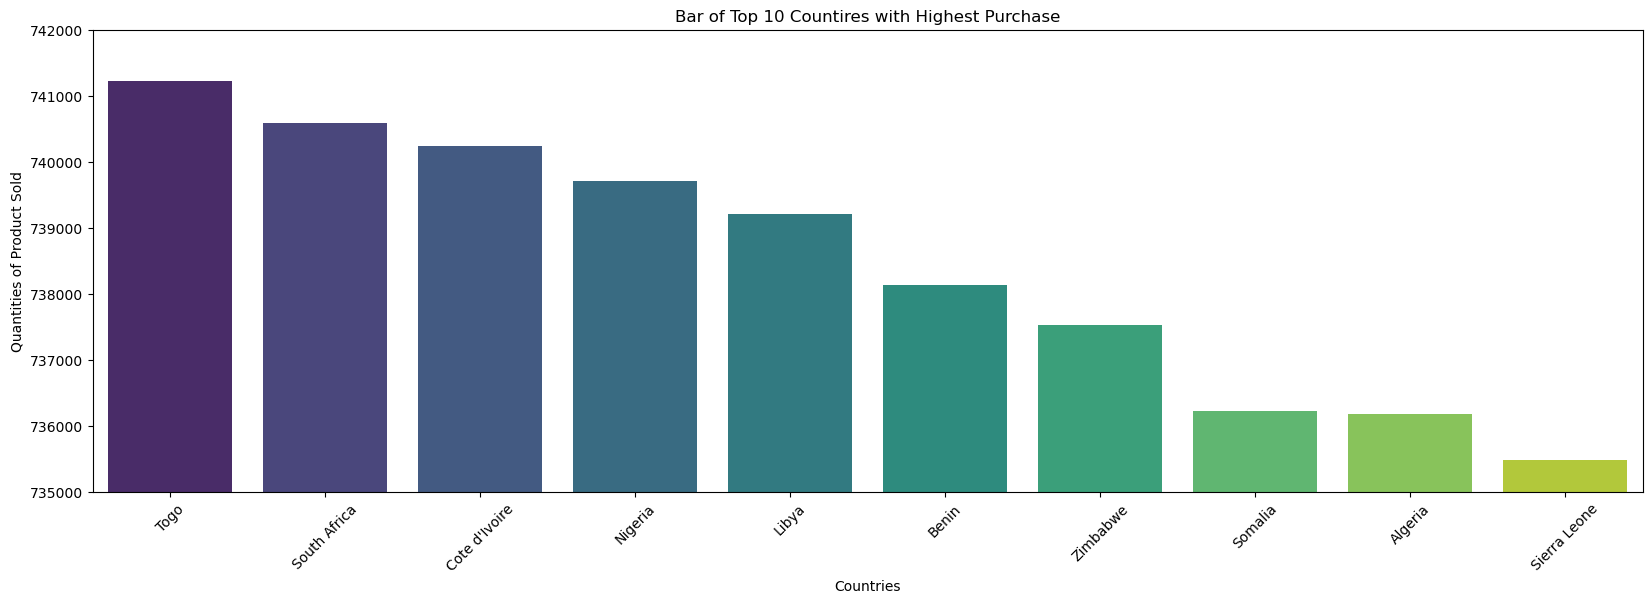

In [16]:
# Visualize top 10 countries where products were sold
top_10_country = quantity_by_country.sort_values('Quantity', ascending=False).head(10)

plt.figure(figsize = (20,6))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_country, estimator=sum, hue='Country', palette='viridis')

plt.xlabel("Countries")
plt.ylabel("Quantities of Product Sold")
plt.title("Bar of Top 10 Countires with Highest Purchase")
plt.xticks(rotation=45)
plt.ylim(735000, 742000)

plt.show()

#Top 10 countries with the highest quantity sold
#The Country with the highest quantity sold is TOgo while the country with the least quantity sold  among the top 10 is Sierra leone

In [19]:
print(Least_10_country)

    index       Country  Quantity
18     11          Mali    732358
19      8         Kenya    732247
20      3      Cameroon    730881
21      5         Egypt    729299
22      2  Burkina Faso    728332
23     10    Madagascar    726297
24     14         Niger    725841
25     22      Tanzania    725664
26     26        Zambia    725152
27     25        Uganda    724525


In [20]:
import warnings

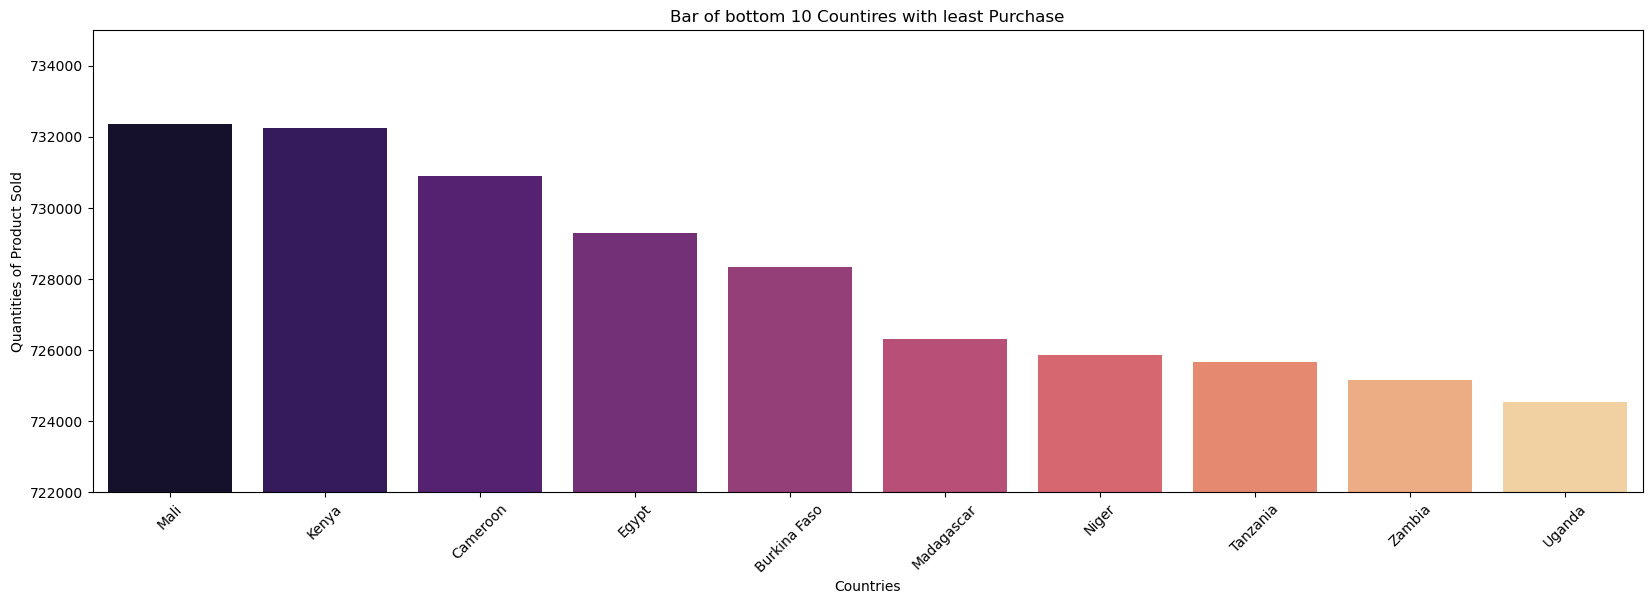

In [21]:
# Visualize least 10 countries where products were sold
Least_10_country = quantity_by_country.sort_values('Quantity', ascending=False).tail(10)

plt.figure(figsize = (20,6))
ax = sns.barplot(x = "Country", y = "Quantity", data = Least_10_country, estimator=sum, palette='magma')

plt.xlabel("Countries")
plt.ylabel("Quantities of Product Sold")
plt.title("Bar of bottom 10 Countires with least Purchase")
plt.xticks(rotation=45)
plt.ylim(722000, 735000)

plt.show()

#10 Least countries with quantity sold 
#Mali has the least quantity sold in our dataset


In [22]:
#analysis of countries and their number of customers

In [23]:
country_to_customer = data.groupby(["Country"])["CustomerID"].nunique().reset_index()

In [24]:
country_to_customer = country_to_customer.sort_values("CustomerID", ascending = False).reset_index()

In [25]:
country_to_customer.head(10) # Countries with the highest number of customers is Mozambique(3072) and Niger comes least.

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049
5,18,Sierra Leone,3046
6,11,Mali,3044
7,0,Algeria,3043
8,17,Senegal,3040
9,14,Niger,3039


<function matplotlib.pyplot.show(close=None, block=None)>

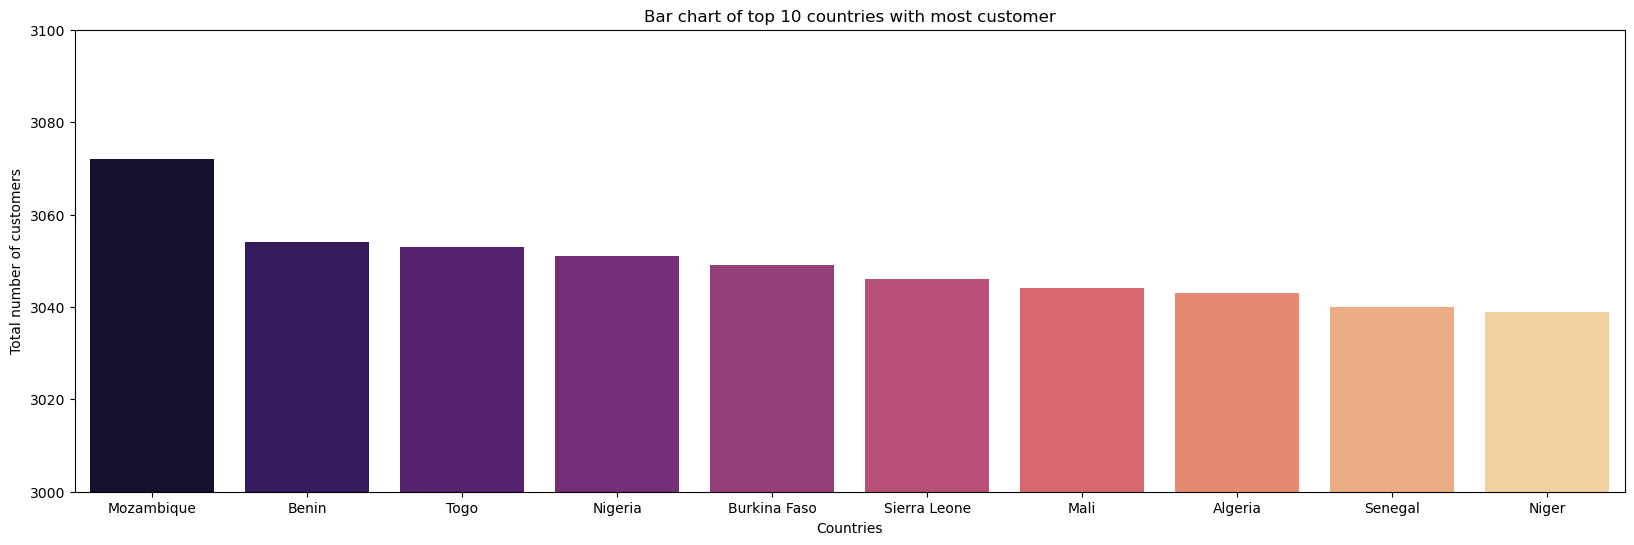

In [26]:
# Draw a plot for top 10 countries with most customers
top_countries_to_customer = country_to_customer.head(10)

plt.figure(figsize = (20,6))
sns.barplot(x = "Country", y = "CustomerID", data = top_countries_to_customer, palette="magma")

plt.xlabel("Countries")
plt.ylabel("Total number of customers")

plt.title("Bar chart of top 10 countries with most customer")
plt.ylim(3000, 3100)
plt.show

**Sales Trend Vizualization** 

In [27]:
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()

In [76]:
monthly_sales.head() #Sales has been on decline as the months went by

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
Freq: M, Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Monthly Sale Trend')

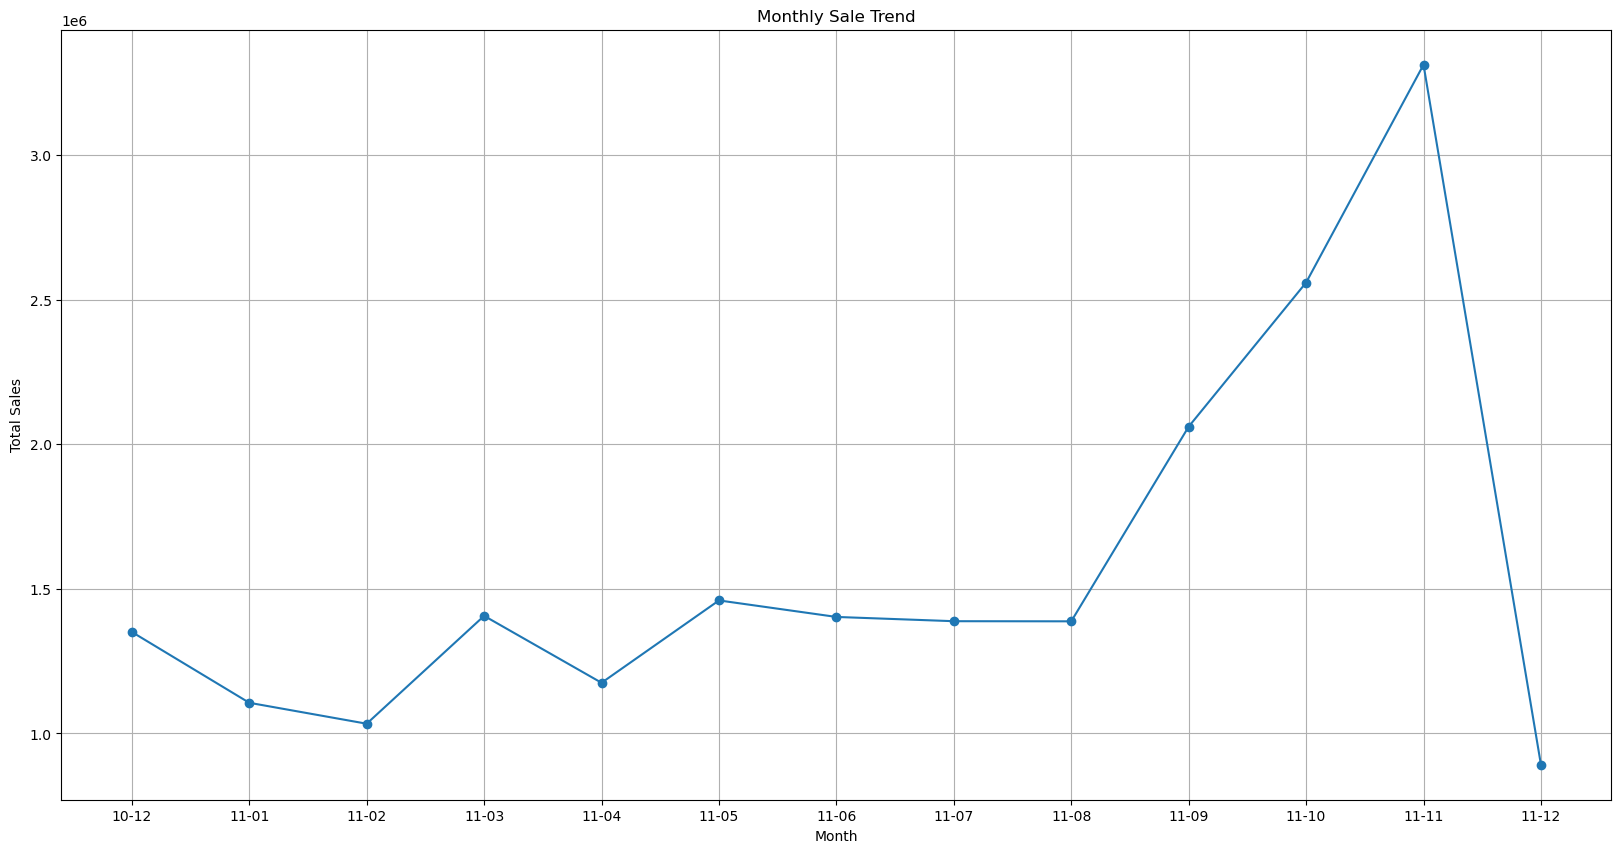

In [28]:
# create a line plot 
plt.figure(figsize=(20,10))
plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values, marker = 'o', linestyle = '-')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.title("Monthly Sale Trend")


#Monthly sales shows that as the month went by we had an increase in our sales
# However sales dropped from the month of November to December 

## Cohort Analysis

In [29]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [30]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [31]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [32]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [33]:
#Creating cohort date features
def get_Cohort_date(data):
    data["Cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["Cohort date"]

In [34]:
data["Cohort date"] = get_Cohort_date(data)

In [35]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


# Cohort Index

**Creating the first_year and first_month purchase**

In [36]:
def get_year_and_month(data, col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [37]:
first_month, first_year = get_year_and_month(data, "Cohort date") # Shows first purchase of customers by month and year

In [38]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: Cohort date, Length: 406829, dtype: int32

In [39]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: Cohort date, Length: 406829, dtype: int32

In [40]:
first_month, first_year

(0         12
 1         12
 2         12
 3         12
 4         12
           ..
 541904     8
 541905     8
 541906     8
 541907     8
 541908     8
 Name: Cohort date, Length: 406829, dtype: int32,
 0         2010
 1         2010
 2         2010
 3         2010
 4         2010
           ... 
 541904    2011
 541905    2011
 541906    2011
 541907    2011
 541908    2011
 Name: Cohort date, Length: 406829, dtype: int32)

**Creating Current_month and current_year Purchase**

In [41]:
latest_month, latest_year = get_year_and_month(data, "InvoiceDate") # Last purchase of customers by month an year

In [42]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [43]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

# Cohort Index 

In [44]:
def create_cohort_index(first_year, first_month, latest_year, latest_month):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff + 1
    return index

In [45]:
data["cohort_index"] = create_cohort_index(first_year, first_month, latest_year, latest_month)

In [46]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


# Cohort Table

In [47]:
cohort_info = data.groupby(["Cohort date", "cohort_index"])["CustomerID"].nunique().reset_index()

**Renaming CustomerID to Number of Customer**

In [48]:
cohort_info.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [49]:
cohort_info.head()

,Cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


**Creating a pivot table**

In [50]:
cohort_table = cohort_info.pivot(index = "Cohort date", columns = ["cohort_index"], values = "Number of customers")
cohort_table.index = cohort_table.index.strftime("%B, %Y")

In [51]:
cohort_table  # Shows the number of customer in each cohort

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort date,,,,,,,,,,,,,
"December, 2010",948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
"January, 2011",421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
"February, 2011",380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
"March, 2011",440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
"April, 2011",299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
"May, 2011",279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
"June, 2011",235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization of Cohort_table

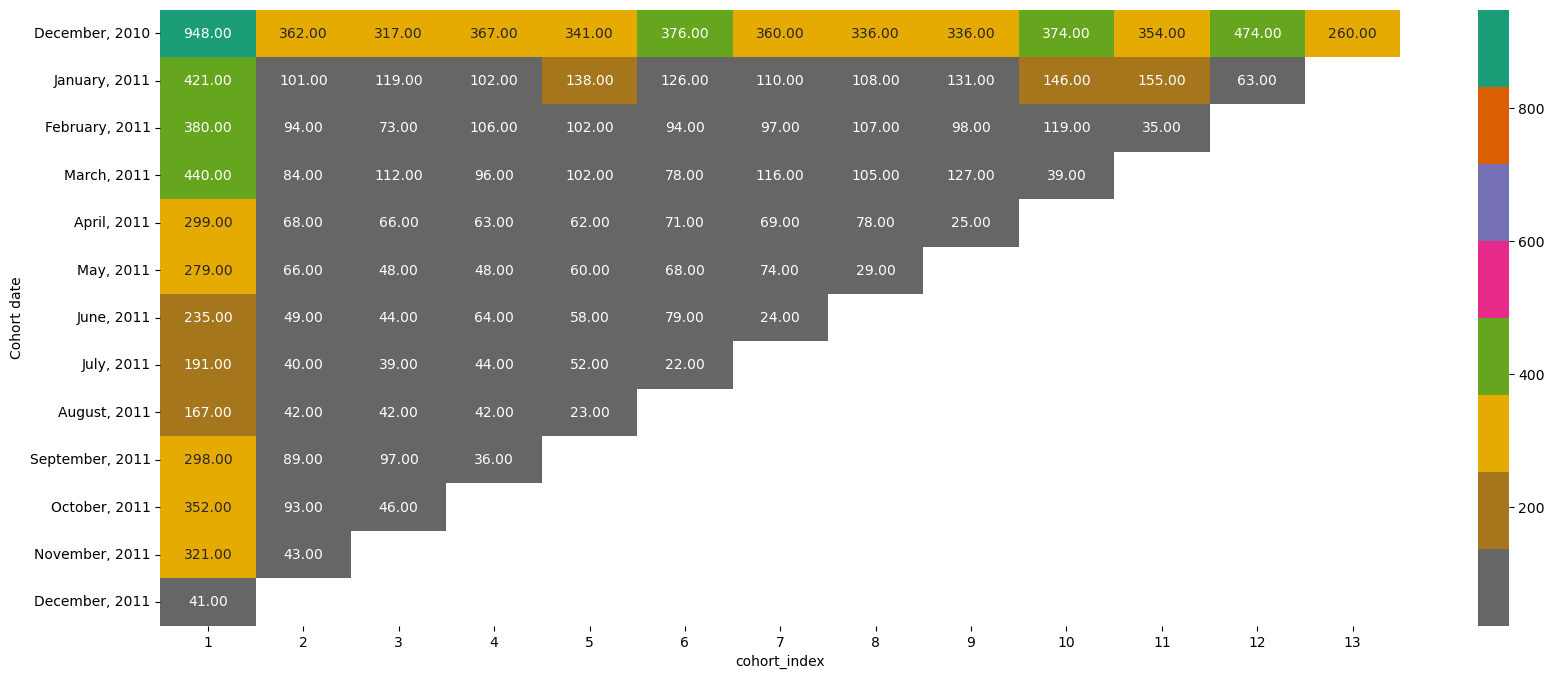

In [52]:
plt.figure(figsize=(20,8))
sns.heatmap(cohort_table, annot = True, cmap = "Dark2_r", fmt = ".2f")
plt.show()

# We have a steady decline in customer retention as the months went by.
# Consistently the last month(december) has the least customer retention rate as the year went.

**Changing to percentage**

In [53]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

In [54]:
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort date,,,,,,,,,,,,,
"December, 2010",1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
"January, 2011",1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
"February, 2011",1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
"March, 2011",1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
"April, 2011",1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
"May, 2011",1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
"June, 2011",1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='Cohort date'>

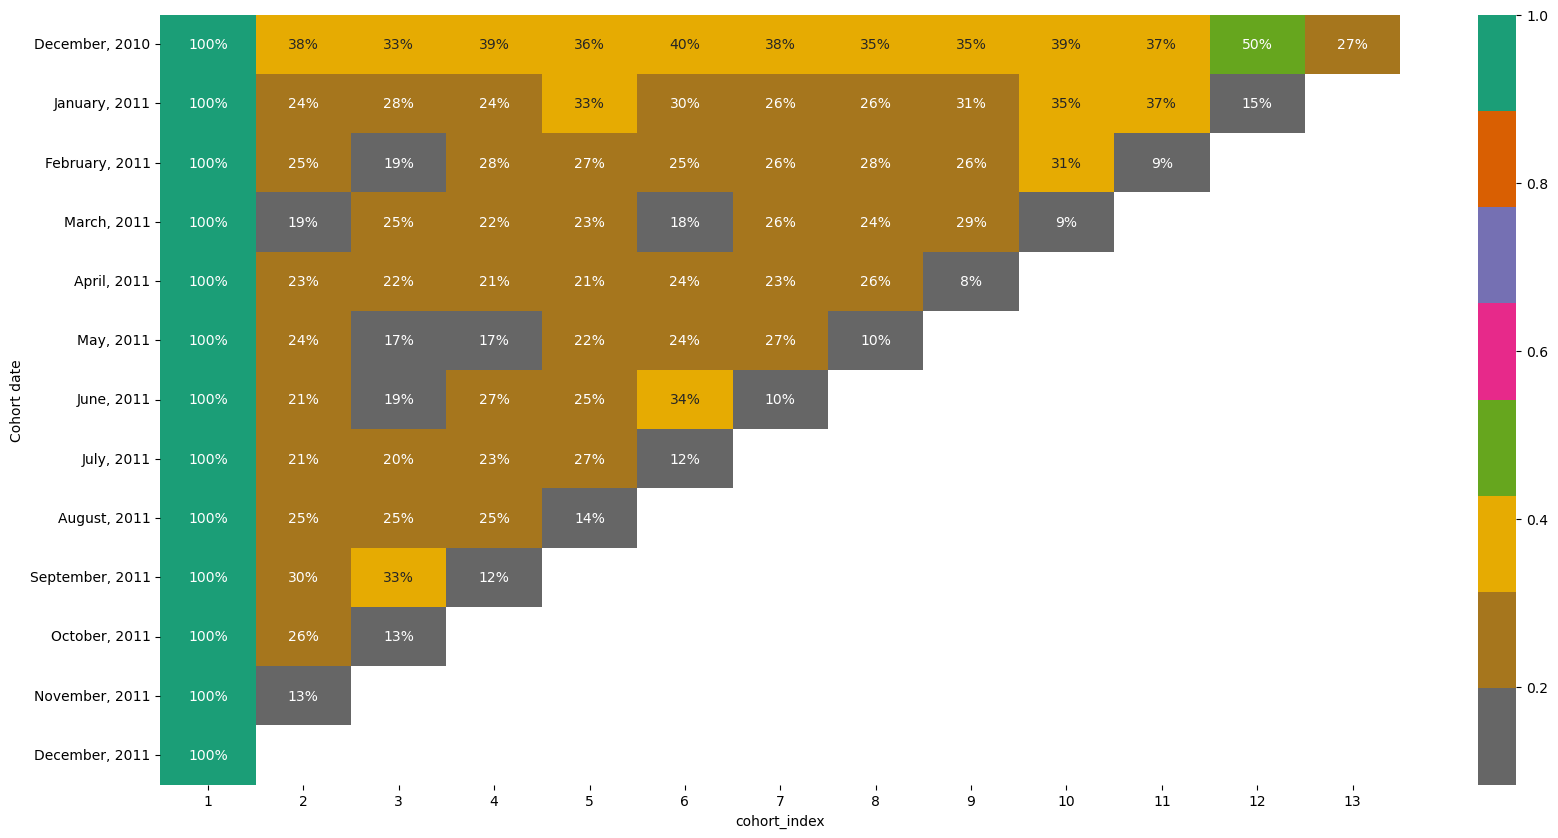

In [55]:
plt.figure(figsize = (20,10))
sns.heatmap(new_cohort_table, annot =True, cmap = "Dark2_r", fmt = ".0%")

**Quantity of Products Bought**

In [58]:
quantity_bought = data.groupby(["Cohort date", "cohort_index"])["Quantity"].sum().reset_index()

In [79]:
quantity_bought

,Cohort date,cohort_index,Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


**Creating a Quantity pivot table**

In [66]:
quantity_table = quantity_bought.pivot(index = "Cohort date", columns = ["cohort_index"], values = "Quantity")
#Changing the date format to a words#
quantity_table.index = quantity_table.index.strftime("%B, %Y")

In [67]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort date,,,,,,,,,,,,,
"December, 2010",1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
"January, 2011",559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
"February, 2011",450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
"March, 2011",563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
"April, 2011",371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
"May, 2011",308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
"June, 2011",285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Visualizing the Pivot table**

<Axes: xlabel='cohort_index', ylabel='Cohort date'>

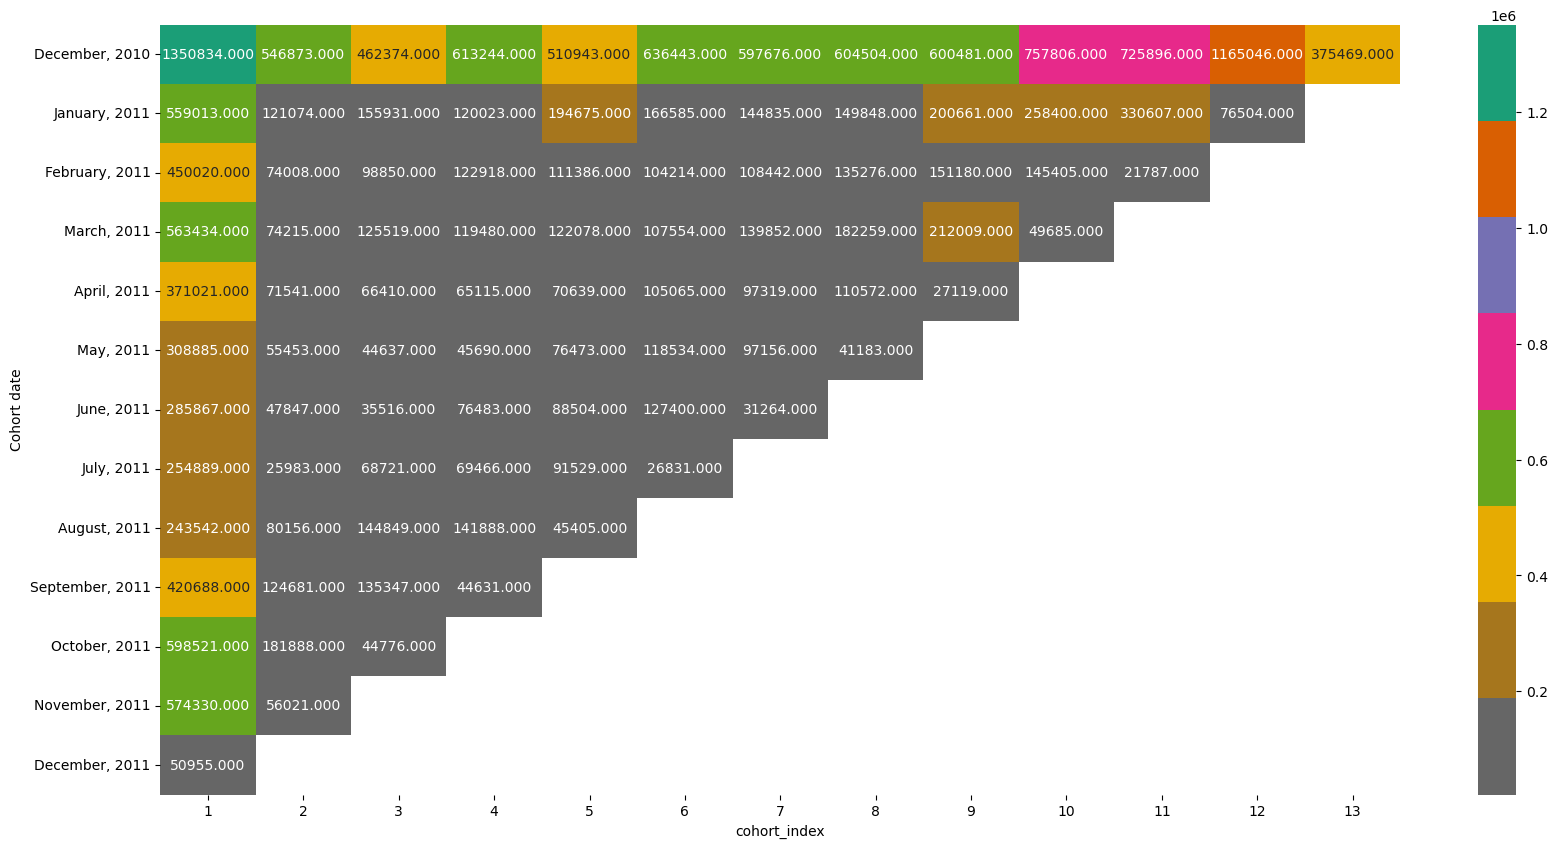

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(quantity_table, annot= True, cmap = "Dark2_r", fmt =".3f")

In [ ]:
#The above pivot table shows the quantity of product in each cohort in every month
#There is decline in quantity bought by customers by the month
# December seems to the have least quantity compared to the other months first retention

In [71]:
#Creating a Pivot table showing the average quantity bought
quantity_bought = data.groupby(["Cohort date", "cohort_index"])["Quantity"].mean().reset_index()

In [72]:
quantity_bought

,Cohort date,cohort_index,Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


In [74]:
#Creating the mean pivot table and its visual
quantity_table = quantity_bought.pivot(index = "Cohort date", columns = ["cohort_index"], values = "Quantity")
#Changing the date format to a words#
quantity_table.index = quantity_table.index.strftime("%B, %Y")
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort date,,,,,,,,,,,,,
"December, 2010",50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
"January, 2011",50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
"February, 2011",51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
"March, 2011",50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
"April, 2011",50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
"May, 2011",50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
"June, 2011",50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Visualizing the Pivot table for quantity bought**

<Axes: xlabel='cohort_index', ylabel='Cohort date'>

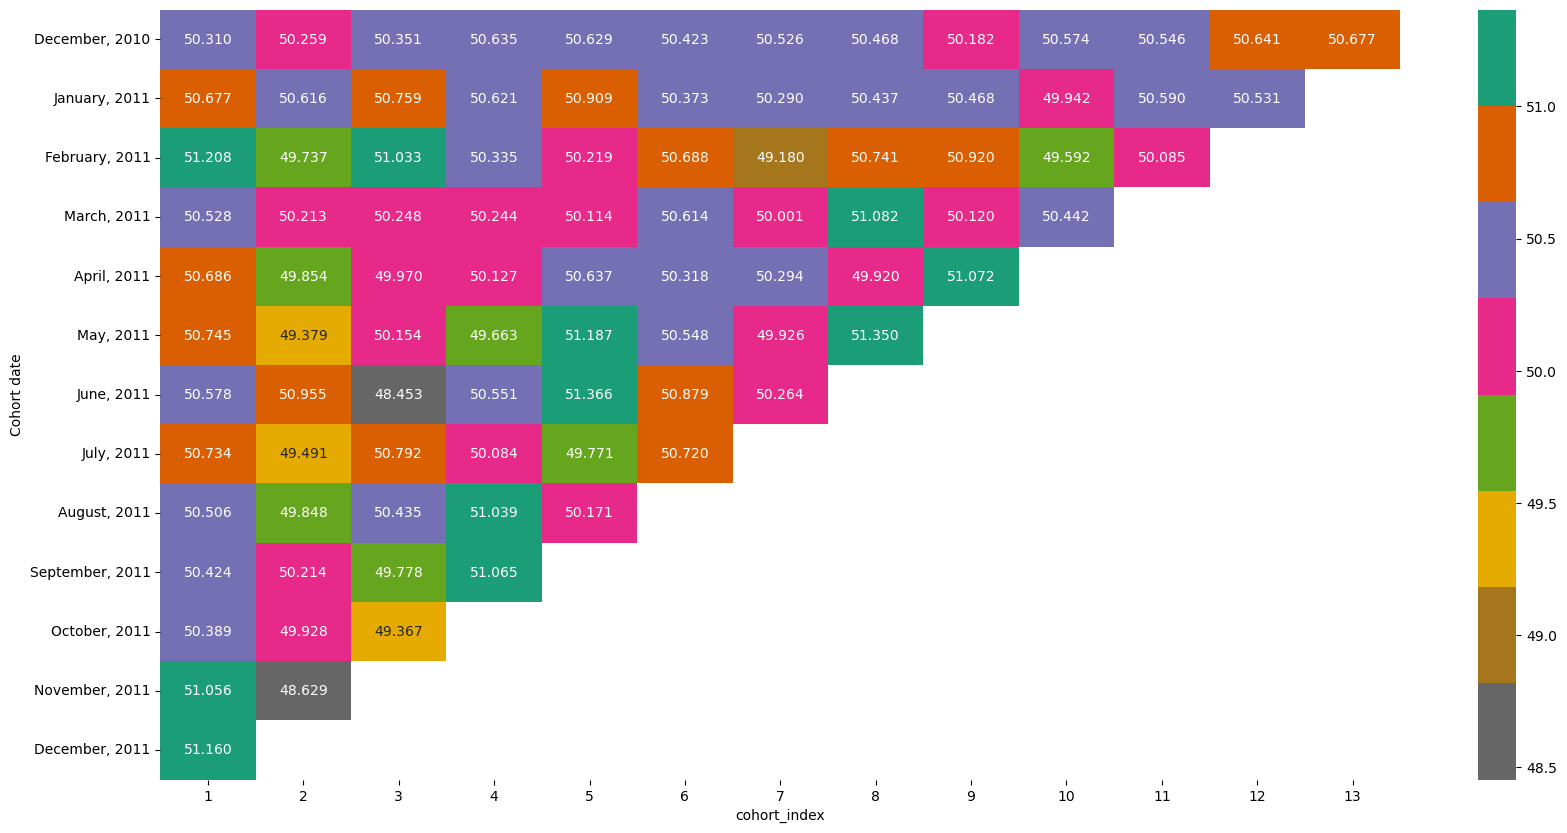

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(quantity_table, annot= True, cmap = "Dark2_r", fmt =".3f")

In [ ]:
#The above visual shows the average quanity of products sold
# The avearge remains at 40-50 which shows that although we had more customers churn, our quantity sold did not differ from quanity sold in the firdt month, However we had some retained customers buy more quantities
# Although the quantity sold also reduced by the month